##**1. Carregando o corpus do TripAdvisor**

In [3]:
import requests

# Corpus TripAdivisor
req = requests.get("https://raw.githubusercontent.com/alcionepaiva/corpora/main/trip.txt")
url_content = req.content
arquivo = open('trip.txt', 'wb')
arquivo.write(url_content)
arquivo.close()

#Labels 

req = requests.get("https://raw.githubusercontent.com/alcionepaiva/corpora/main/tripLabels.txt")
url_content = req.content
arquivo = open('tripLabels.txt', 'wb')
arquivo.write(url_content)
arquivo.close()

!ls


sample_data  tripLabels.txt  trip.txt


##**2. Carregando o corpus na memoria**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Number of lines used: 69078

rebuilding corpus...
['opção', 'ipanema', 'sua', 'localização', 'é', 'perfeita', 'pois', 'encontra', 'próximo', 'praia', 'assim', 'principal', 'rua', 'comercial', 'bairro', 'dali', 'é', 'possível', 'ir', 'caminhando', 'cocacana', 'leblon', 'vale', 'lembrar', 'domingos', 'principal', 'feira', 'cidade', 'fica', 'praticamente', 'lado']
opção Ipanema Sua localização é perfeita pois encontra próximo praia assim principal rua comercial bairro Dali é possível ir caminhando Cocacana Leblon Vale lembrar domingos principal feira cidade fica praticamente lado
Muito bom Hotel aparentemente antigo porém bastante aconchegante Pelo valor diária esperava menos preço é abaixo reais área lazer vista praia Ipanema bastante cobrar uns reais
No coração Ipanema Para quer curtir Ipanema hotel ótima localização Funcionários prestativos atenciosos Esses dois grandes atrati

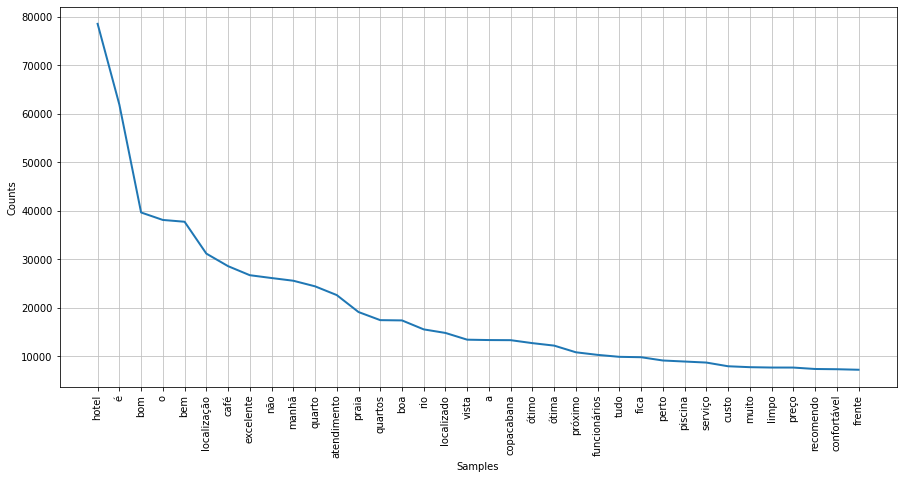

Gerando bigrams...
**************************************
computando a distribuicao de frequencia para todos os bigrams no texto
Numero: 2115750


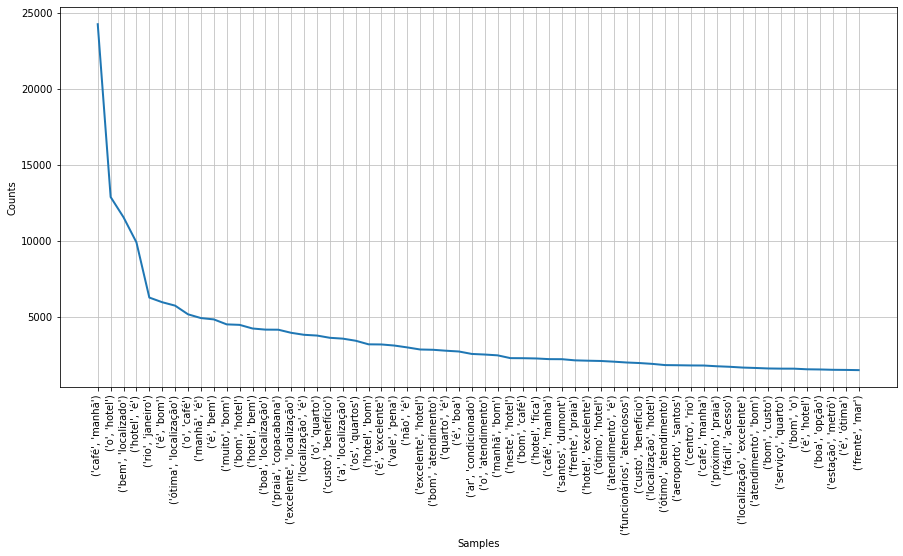


Processing time: 167.56529259681702


In [4]:
import time 
import operator
from matplotlib import pyplot
from nltk.text import Text
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.util import ngrams
from numpy import array
import numpy as np
from numpy import zeros
from numpy import asarray
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import RegexpTokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import text_to_word_sequence
import nltk


tempo = time.time()
nltk.download('punkt')

#Parameters
PERCENTAGE = 100       # Percentage of the corpus that will be used

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, mode='rt', encoding='UTF-8')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text
 
# split a loaded document into sentences
def to_lines(doc, percentage):
  lines = doc.strip().split('\n')
  n = int(len(lines)*percentage/100)
  print('Number of lines used:',n)
  if lines[n-1]=="":
    return lines[:n-1]
  return lines

#loading the corpus 
filename = 'trip.txt'
doc = load_doc(filename)
corpus = to_lines(doc,PERCENTAGE)
sentences=[]

print('\nrebuilding corpus...')
for linha in corpus:
  tokens = text_to_word_sequence(linha)
  sentences.append(tokens)

print(sentences[0])

for l in corpus[:3]:
   print(l)
    
palavras=[]

print ("\nTokenizando...")
palavras = text_to_word_sequence(doc)
vocab = sorted(set(palavras))
vocab_size = len(vocab)

tokenizer = Tokenizer(lower=True, split=' ') 
tokenizer.fit_on_texts(doc)
sequences = tokenizer.texts_to_sequences(doc)
print("************************") 
print('Numero de linhas:',len(corpus))
print('Numero de palavras',len(palavras))
print('Tamanho vocabulario:',vocab_size)

print(palavras[:3])
print(sequences[:3])

print("Calculando Frequencia...")

fdist = nltk.FreqDist(palavras)

sorted_fdist = sorted(fdist.items(), key=operator.itemgetter(1))

ntokens = len(sorted_fdist)

num = len([a for a in fdist if fdist[a]>(7000)])
pyplot.figure(figsize=(15, 7))
fdist.plot(num) 


print ("Gerando bigrams...")
n = 2
bgs = ngrams(palavras, n)

print("**************************************")
print("computando a distribuicao de frequencia para todos os bigrams no texto")
fdist = nltk.FreqDist(bgs)

print ("Numero:",fdist.N())

num = len([a for a in fdist if fdist[a]>(1500)])

pyplot.figure(figsize=(15, 7))
fdist.plot(num)


print ("\nProcessing time:",time.time() -tempo)

#**3.Transformação para Word2vec**

Word2vec...
------------Vetor Word2vec-------------
palavra: cama
[ 0.02428726 -0.03628451 -0.08179235 -0.05544562 -0.01486279 -0.08199148
 -0.03087321 -0.03141543 -0.09811389 -0.05173976  0.01532648  0.05295145
 -0.01459256 -0.00521955 -0.03083843 -0.04617553  0.01456338 -0.02178924
 -0.06186007 -0.00331338 -0.05166748 -0.01133226  0.01662398 -0.02026025
 -0.02225548  0.01836354  0.09869782 -0.05100425  0.03415818 -0.01601036
  0.00128171  0.04203804 -0.07025716 -0.08454321  0.05905179  0.00915149
  0.00567784  0.00507112  0.06176309 -0.03699495  0.00709689  0.00341705
 -0.05757496 -0.05301502 -0.01376007 -0.01365942 -0.03392289  0.07442845
 -0.01902352  0.01988313  0.00706686 -0.05835524  0.00335722 -0.03153444
  0.00671115 -0.039782   -0.03436105  0.00765455  0.00144291  0.03749595
 -0.01555951  0.02153891 -0.05846471 -0.02709581 -0.05645972  0.0122189
 -0.0180205  -0.0540946  -0.02322198 -0.01554396 -0.01992366  0.05847482
 -0.02632674 -0.0567997   0.03229112 -0.01723514  0.0021550

<Figure size 432x288 with 0 Axes>

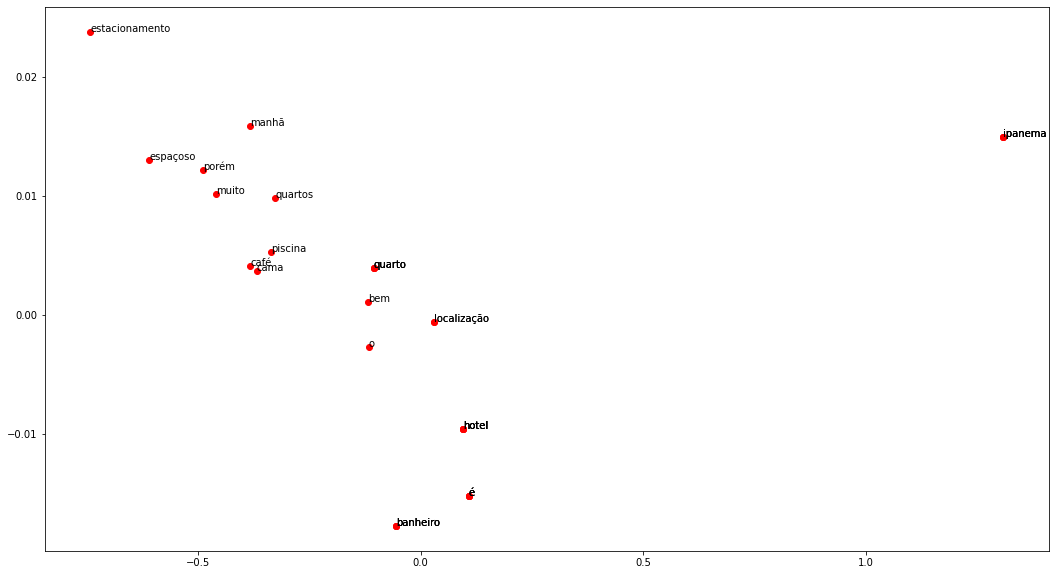

In [4]:
import os
import pandas as pd
import nltk
import gensim
import numpy as np
import codecs
import itertools
import time
import random

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from gensim import corpora, models, similarities
from nltk.probability import *

from sklearn.decomposition import PCA
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding

from numpy import asarray
from numpy import zeros

tempo = time.time()

print ("Word2vec...")

vector_size = 100

model = gensim.models.Word2Vec([palavras], min_count=1,window=5,  size=vector_size)

teste = "cama"

print("------------Vetor Word2vec-------------")
print("palavra:", teste)
print(model.wv[teste])

print("------------Similar Word2vec-------------")
print("palavra:", teste)
print(model.wv.most_similar(teste))

# fit a 2d PCA model to the vectors
semantically_similar_words = {words: [item[0] for item in model.wv.most_similar([words], topn=5)]
  for words in ['cama', 'piscina', 'café', 'banheiro', 'estacionamento']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))


all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

word_vectors = model.wv[all_similar_words]

pca = PCA(n_components=2)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words
pyplot.clf()
pyplot.figure(figsize=(18, 10))
pyplot.scatter(p_comps[:, 0], p_comps[:, 1], c='red')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    pyplot.annotate(word_names, xy=(x, y), xytext=(0, 0), textcoords='offset points')


print("------------Similar entre palavras-------------")
print("palavras: colchão e", teste)
print(model.wv.similarity('colchão', teste))

print ("\n...Fim...")

#**4. Inclui o fasttText e executa similaridade**

In [21]:
from gensim.models import FastText

vector_size = 16

ft = FastText(sentences, size=vector_size, window=5, min_count=5, workers=4,sg=1)


In [22]:
wv = ft.wv

wv.most_similar("cama")
#len(ft.words), len(ft.labels)

semantically_similar_words = {words: [item[0] for item in wv.most_similar([words], topn=5)]
  for words in ['cama', 'piscina', 'café', 'banheiro', 'estacionamento']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

cama:['queen', 'rouparia', 'colchão', 'roupa', 'banheiro']
piscina:['pscina', 'cobertura', 'picina', 'psicina', 'pisicina']
café:['manhã', 'variado', 'farto', 'diversificado', 'completo']
banheiro:['box', 'colchão', 'limo', 'colcha', 'cortininha']
estacionamento:['garagem', 'manobra', 'estacionamentos', 'terceirizado', 'pago']


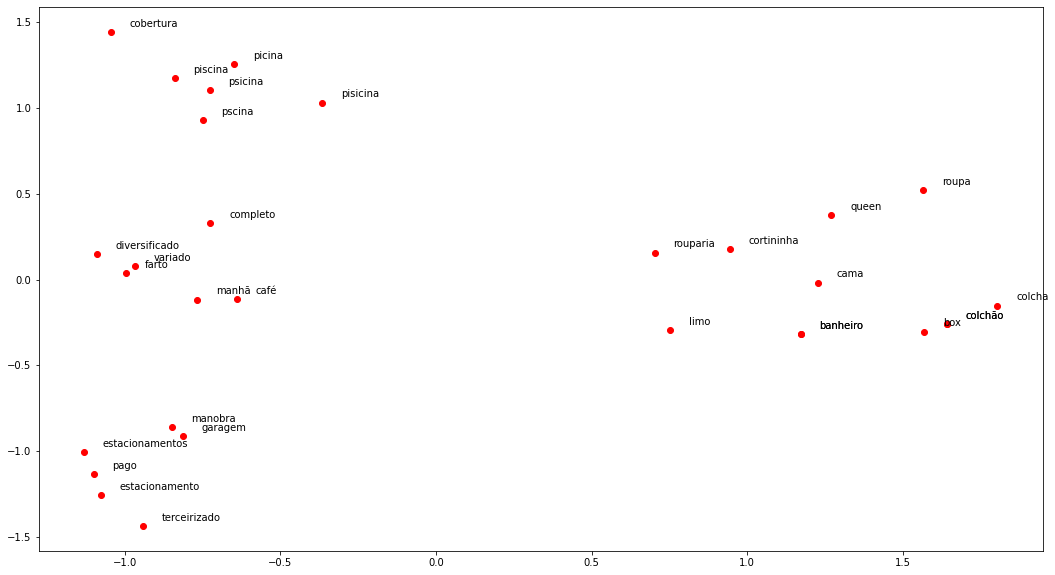

In [23]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])

word_vectors = wv[all_similar_words]

pca = PCA(n_components=2)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words

pyplot.figure(figsize=(18, 10))
pyplot.scatter(p_comps[:, 0], p_comps[:, 1], c='red')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    pyplot.annotate(word_names, xy=(x+0.06, y+0.03), xytext=(0, 0), textcoords='offset points')

#**5. Analise de sentimento**


Word a:
[ 0.22396687 -0.06274459 -0.557163    0.20369637 -0.08571432  0.31388265
 -0.17546643 -0.00246728  0.2546888  -0.16375476  0.34590954 -0.37031072
 -0.14514558  0.09316613  0.07348086  0.21020523]
Number of lines used: 69078
Reading labels...
Number of labels: 69078
Vocab size: 34159
[53, 73, 1221, 6, 2, 180, 60, 1014, 23, 13, 210, 769, 118, 1238, 259, 2968, 2, 380, 103, 868, 14540, 282, 57, 3463, 2225, 769, 1527, 65, 26, 528, 107]
[   53    73  1221     6     2   180    60  1014    23    13   210   769
   118  1238   259  2968     2   380   103   868 14540   282    57  3463
  2225   769  1527    65    26   528   107     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0]
defining the model...
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape        

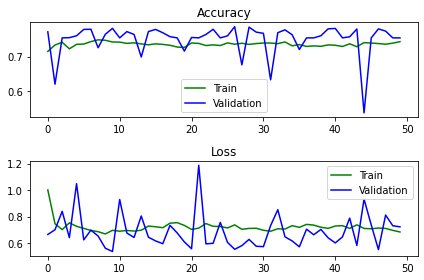

Accuracy: 75.427777
Processing time: 423.90190958976746


In [33]:
import numpy as np
from numpy import asarray
from numpy import zeros
import codecs
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding
from keras.callbacks import EarlyStopping
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import LSTM, GRU
from keras.layers.convolutional import Conv1D,Conv2D, MaxPooling1D, MaxPooling1D

from keras.optimizers import Adam
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


import time

tempo = time.time()

# fix random seed for reproducibility
seed = 7
np.random.seed(int(tempo))

#####################################################
#  Definindo os arquivos
#  1) Avaliações textuais
#  2) Labels normalizadas
#
# Carregando os vetores na memoria
#####################################################
embeddings_index = dict()
for w in vocab:
  if w in wv.vocab:
    embeddings_index[w] = wv[w]

print('Word %s:' % list(embeddings_index.keys())[0] )
print(embeddings_index[list(embeddings_index.keys())[0]])

#####################################################
# Carregando as avaliações e os labels
#####################################################
labelsf = to_lines(load_doc('tripLabels.txt'),100)
labels = []

print('Reading labels...')
for linha in labelsf:
    labels.append(float(linha))

print('Number of labels:',len(labels))


#####################################################
# Preparando o tokenizer do keras
#####################################################
t = Tokenizer()
t.fit_on_texts(corpus)
t.word_index['']=0
vocab_size = len(t.word_index) + 2

print('Vocab size:',vocab_size)


#####################################################
# Mapeia cada palavra para um número inteiro
#####################################################
encoded_docs = t.texts_to_sequences(corpus)
print(encoded_docs[0])


#####################################################
# Completa todas as codificações para o tamanho máximo
# preenchendo com zeros
#####################################################
max_length = 65
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs[0])

#####################################################
# Associa a cada indice da palavra ao seu vetor Glove  
#####################################################
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, vector_size))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
        
#print("Word ",t.word_index.items())

        
print('defining the model...')

#####################################################
# Cria o modelo da rede neural  
#####################################################

nneurons = max_length* vector_size

model = Sequential()

model = Sequential()
e = Embedding(vocab_size, vector_size, weights=[embedding_matrix], input_length=max_length, trainable=False)
model.add(e)
model.add(GRU(128, input_shape=(max_length, vector_size)))

#model.add(Conv1D(32, kernel_size=3,  activation='relu', padding='same'))
#model.add(Conv1D(32, kernel_size=3, activation='relu', padding='same'))
#model.add(Conv1D(32, kernel_size=3, activation='relu', padding='same'))
#model.add(Dropout(0.25))

#model.add(Conv1D(32, kernel_size=2, activation='relu', padding='same'))
#model.add(Conv1D(32, kernel_size=2, activation='relu', padding='same'))
#model.add(Conv1D(32, kernel_size=2, activation='relu', padding='same'))
#model.add(Conv1D(32, kernel_size=2, activation='relu', padding='same'))
#model.add(Dropout(0.25))

model.add(Flatten())

#model.add(Dense(256, activation='tanh'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(0.2))
#model.add(Dense(1, activation='sigmoid'))
model.add(Dense(3,activation='softmax'))

#####################################################
# Compila o modelo da rede neural  
#####################################################
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.compile(Adam(lr=0.04),'categorical_crossentropy', metrics=['acc'])

print(model.summary())

#####################################################
# Divide em 80% para treinamento e 20% para teste  
#####################################################
labels = np.asarray(labels) 
print("labels fase 1:",labels[:100])
labelsNorm = labels * 2
labelsNorm  = labelsNorm.astype('int')
print("labels fase 2:",labelsNorm[:100])
labelsNorm = np_utils.to_categorical(labelsNorm)
#print("labels fase 3:",labelsNorm[:50][:])

padded_docs =  np.asarray(padded_docs)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, labelsNorm, test_size=0.5, random_state=seed)

#####################################################
# Treina
#####################################################
nb_epochs =50
batch_size = 32

hist = model.fit(X_train, y_train,  batch_size=batch_size,
          shuffle=True,
          epochs=nb_epochs,
          validation_data=(X_test, y_test))

#####################################################
# Realiza predições
#####################################################
print("Predictions")
pred_ids = np.random.randint(0, 1000, 10)
for pred_id in pred_ids:
    xtest = X_test[pred_id].reshape(1, max_length)
    ytest = model.predict(xtest)
    print("sentence:  ", end=' ')
    for  x in list( X_test[pred_id]):
        print(" ".join([list(t.word_index.keys())[list(t.word_index.values()).index(x)]]), end= ' ')
    print()
    print("predicted: ", ytest[0])
    print("label:     ", y_test[pred_id])
    print()

#####################################################
# Plota perda e precisão
#####################################################
plt.subplot(211)
plt.title("Accuracy")
plt.plot(hist.history["acc"], color="g", label="Train")
plt.plot(hist.history["val_acc"], color="b", label="Validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("Loss")
plt.plot(hist.history["loss"], color="g", label="Train")
plt.plot(hist.history["val_loss"], color="b", label="Validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

#####################################################
# Avalia o modelo
#####################################################
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

print ("Processing time:",time.time() -tempo) 